### !pip uninstall -y scikit-learn
!pip install scikit-learn==1.3.1

In [2]:
!pip install graphviz

In [3]:
!pip install seaborn

  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached python_dateutil-2.9.0.post0-py2.py3-none-any.whl.metadata (8.4 kB)
   ---------------------------------------- 0.0/8.0 MB ? eta -:--:--
   --------- ------------------------------ 1.8/8.0 MB 10.2 MB/s eta 0:00:01
   ---------------------------- ----------- 5.8/8.0 MB 15.0 MB/s eta 0:00:01
   ---------------------------------------- 8.0/8.0 MB 16.5 MB/s eta 0:00:00
   ---------------------------------------- 0.0/11.5 MB ? eta -:--:--
   -------------------- ------------------- 5.8/11.5 MB 28.6 MB/s eta 0:00:01
   ---------------------------------------  11.3/11.5 MB 30.2 MB/s eta 0:00:01
   ---------------------------------------- 11.5/11.5 MB 27.2 MB/s eta 0:00:00
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
   ---------------------------------------- 0.0/2.2 MB ? eta -:--:--
   ---------------------------------------- 2.2/2.2 MB 28.4 MB/s eta 0:00:00
   ---------------------------------------- 0.0/2

In [3]:
import pandas as pd
import numpy as np
import os
import matplotlib
import matplotlib.pyplot as plt
import scipy.stats as spst
import imblearn

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

In [4]:
pd_sas22 = pd.read_sas('./data_set1.sas7bdat', format='sas7bdat')
pd_sas23 = pd.read_sas('./data_set2.sas7bdat', format='sas7bdat')

In [5]:
df_merged=pd.concat([pd_sas22, pd_sas23], ignore_index=True)
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13194 entries, 0 to 13193
Columns: 675 entries, mod_d to LF_SECUR_Y
dtypes: float64(632), object(43)
memory usage: 67.9+ MB


### 데이터 전처리

In [6]:
import pandas as pd

# 예제 DataFrame (실제 df_merged를 사용하세요)
# df_merged = pd.read_csv("your_dataset.csv")

# 선택할 변수명 리스트
columns_to_select = [
    "allownc", "npins", "DI1_dg", "DI2_dg", "DE1_dg", "DJ4_dg", "DL1_dg",
    "DJ8_dg", "DJ6_dg", "DH4_dg", "DN1_dg", "EC_occp", "HE_obe", "BD1_11",
    "BD2_14", "BP16_1", "BP16_2", "BS3_1", "BS3_2", "BS12_47", "BS12_47_1",
    "BE3_73", "BE3_83", "BE3_77", "BE3_87", "BE9", "BE5_1", "HE_fh",
    "HE_HPfh1", "HE_HPfh2", "HE_HPfh3", "HE_HLfh1", "HE_HLfh2", "HE_HLfh3",
    "HE_IHDfh1", "HE_IHDfh2", "HE_IHDfh3", "HE_STRfh1", "HE_STRfh2",
    "HE_STRfh3", "HE_DMfh1", "HE_DMfh2", "HE_DMfh3", "L_BR_FQ", "L_LN_FQ",
    "L_DN_FQ"
]

# 새로운 데이터프레임 생성
df_selected = df_merged[columns_to_select]

# 결과 확인
df_selected.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13194 entries, 0 to 13193
Data columns (total 46 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   allownc    13194 non-null  float64
 1   npins      13194 non-null  float64
 2   DI1_dg     13185 non-null  float64
 3   DI2_dg     13185 non-null  float64
 4   DE1_dg     13185 non-null  float64
 5   DJ4_dg     13185 non-null  float64
 6   DL1_dg     13185 non-null  float64
 7   DJ8_dg     13185 non-null  float64
 8   DJ6_dg     13185 non-null  float64
 9   DH4_dg     13185 non-null  float64
 10  DN1_dg     13185 non-null  float64
 11  EC_occp    13185 non-null  float64
 12  HE_obe     10977 non-null  float64
 13  BD1_11     13185 non-null  float64
 14  BD2_14     13185 non-null  float64
 15  BP16_1     13185 non-null  float64
 16  BP16_2     13185 non-null  float64
 17  BS3_1      13185 non-null  float64
 18  BS3_2      13185 non-null  float64
 19  BS12_47    13185 non-null  float64
 20  BS12_4

In [7]:
# 질병(종속변수)의 변수명이 D로 시작하고 dg로 끝남
dependent_columns = [col for col in df_selected.columns if col.startswith('D') and col.endswith('dg')]

# 종속변수의 데이터 분포 확인
disease_value_counts = df_selected[dependent_columns].apply(lambda x: x.value_counts())

# 결과 출력
print(disease_value_counts)

     DI1_dg  DI2_dg  DE1_dg  DJ4_dg  DL1_dg  DJ8_dg  DJ6_dg  DH4_dg  DN1_dg
0.0    8019    8283    9853    9946    9882    8549    9481    9573   10034
1.0    3206    2942    1372     348     412    1745     813     721     260
8.0    1959    1959    1959    1959    1959    1959    1959    1959    1959
9.0       1       1       1     932     932     932     932     932     932


In [8]:
# 8은 0으로 대체
df_selected[dependent_columns] = df_selected[dependent_columns].replace(8, 0)

# 9는 삭제
df_selected = df_selected[~(df_selected[dependent_columns] == 9).any(axis=1)]

disease_value_counts = df_selected[dependent_columns].apply(lambda x: x.value_counts())

# 결과 확인
print(disease_value_counts)

     DI1_dg  DI2_dg  DE1_dg  DJ4_dg  DL1_dg  DJ8_dg  DJ6_dg  DH4_dg  DN1_dg
0.0    9358    9550   11038   11905   11841   10508   11440   11532   11993
1.0    2895    2703    1215     348     412    1745     813     721     260


C:\Users\uesr\AppData\Local\Temp\ipykernel_1412\3079253377.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected[dependent_columns] = df_selected[dependent_columns].replace(8, 0)


In [9]:
# 종속변수가 결측치인 행 삭제
df_selected = df_selected.dropna(subset=dependent_columns)

df_selected[dependent_columns].isnull().sum()


DI1_dg    0
DI2_dg    0
DE1_dg    0
DJ4_dg    0
DL1_dg    0
DJ8_dg    0
DJ6_dg    0
DH4_dg    0
DN1_dg    0
dtype: int64

In [10]:
# 남은 변수의 결측치 확인
df_selected.isnull().sum().sort_values(ascending=False)

HE_obe       2157
HE_fh        1781
HE_IHDfh1    1295
HE_IHDfh2    1295
HE_IHDfh3    1295
HE_HLfh3     1295
HE_STRfh2    1295
HE_STRfh3    1295
HE_DMfh1     1295
HE_DMfh2     1295
HE_DMfh3     1295
HE_HPfh2     1295
HE_HPfh1     1295
HE_STRfh1    1295
HE_HLfh1     1295
HE_HLfh2     1295
HE_HPfh3     1295
L_LN_FQ       394
L_DN_FQ       394
L_BR_FQ       394
DJ8_dg          0
DH4_dg          0
npins           0
DE1_dg          0
DI2_dg          0
DI1_dg          0
allownc         0
DJ6_dg          0
DL1_dg          0
DJ4_dg          0
BD1_11          0
EC_occp         0
DN1_dg          0
BE5_1           0
BE3_83          0
BE3_77          0
BE3_87          0
BE9             0
BS3_1           0
BP16_2          0
BP16_1          0
BS3_2           0
BD2_14          0
BS12_47         0
BS12_47_1       0
BE3_73          0
dtype: int64

In [11]:
# MICE 결측치 대체
miceimputer = IterativeImputer(random_state=42)
df_processed = pd.DataFrame(miceimputer.fit_transform(df_selected), columns=df_selected.columns)
df_processed.isnull().sum()

allownc      0
npins        0
DI1_dg       0
DI2_dg       0
DE1_dg       0
DJ4_dg       0
DL1_dg       0
DJ8_dg       0
DJ6_dg       0
DH4_dg       0
DN1_dg       0
EC_occp      0
HE_obe       0
BD1_11       0
BD2_14       0
BP16_1       0
BP16_2       0
BS3_1        0
BS3_2        0
BS12_47      0
BS12_47_1    0
BE3_73       0
BE3_83       0
BE3_77       0
BE3_87       0
BE9          0
BE5_1        0
HE_fh        0
HE_HPfh1     0
HE_HPfh2     0
HE_HPfh3     0
HE_HLfh1     0
HE_HLfh2     0
HE_HLfh3     0
HE_IHDfh1    0
HE_IHDfh2    0
HE_IHDfh3    0
HE_STRfh1    0
HE_STRfh2    0
HE_STRfh3    0
HE_DMfh1     0
HE_DMfh2     0
HE_DMfh3     0
L_BR_FQ      0
L_LN_FQ      0
L_DN_FQ      0
dtype: int64

In [12]:
# 독립변수와 종속변수로 나누기
y = df_processed[dependent_columns].copy()
x = df_processed.drop(columns=dependent_columns).copy()

In [13]:
# 독립변수 분포 확인 후 클래스 불균형이 너무 심하거나 다른 변수로도 대체가능할 것으로 보이는 변수 삭제
x_cleaned = x.drop(columns=['BS3_2', 'BS12_47', 'BS12_47_1', 'BE3_73', 'BE3_83', 'BE3_77', 'BE3_87', 'BE9'])

In [14]:
import pandas as pd

# 값 변경 함수
def modify_values(df):
    # allownc열
    df['allownc'] = df['allownc'].replace({10: 1, 20 : 0})

    # npins 열
    df['npins'] = df['npins'].replace({9: 1, 2: 0})

    # EC_occp 열
    df['EC_occp'] = df['EC_occp'].replace({88: 11, 99: 11})

    # BE9 열
    df['EC_occp'] = df['EC_occp'].replace({88: 1, 99: 1})

    # BS5_1 열
    df['BE5_1'] = df['BE5_1'].replace({9: 1})

    # BD1_11 열
    df['BD1_11'] = df['BD1_11'].replace({8: 1, 9: 1})

    # BD2_14 열
    df['BD2_14'] = df['BD2_14'].replace({888: 1, 999: 1})

    # BP16_1 열
    bp16_1_mode = df['BP16_1'].mode()[0]  # BP16_1 최빈값 계산
    df['BP16_1'] = df['BP16_1'].replace({1: 5, 2: 5, 3: 5, 4: 5,
                                         10: 9, 11: 9, 12: 9, 13: 9, 14: 9,
                                         88: bp16_1_mode, 99: bp16_1_mode})

    # BP16_2 열
    bp16_2_mode = df['BP16_2'].mode()[0]  # BP16_2 최빈값 계산
    df['BP16_2'] = df['BP16_2'].replace({1: 5, 2: 5, 3: 5, 4: 5,
                                         10: 9, 11: 9, 12: 9, 13: 9, 14: 9, 15: 9, 16: 9,
                                         88: bp16_2_mode, 99: bp16_2_mode})

    # BS3_1 열
    df['BS3_1'] = df['BS3_1'].replace({2: 1, 8: 2, 9: 2, 3:2})

    return df

# x_cleaned 데이터프레임 값 변경 적용
x_cleaned = modify_values(x_cleaned)


In [15]:
# 'HE'로 시작하는 변수와 'L'로 시작하고 'FQ'로 끝나는 변수 선택
columns_to_round = [col for col in x_cleaned.columns if col.startswith('HE') or (col.startswith('L') and col.endswith('FQ'))]

# 선택된 열에 대해 반올림과 반내림
for col in columns_to_round:
    # 반올림
    x_cleaned[f'{col}'] = np.round(x_cleaned[col])
    # 반내림 (내림은 floor 사용)
    x_cleaned[f'{col}'] = np.floor(x_cleaned[col])

# 결과 확인
x_cleaned.head()


,allownc,npins,EC_occp,HE_obe,BD1_11,BD2_14,BP16_1,BP16_2,BS3_1,BE5_1,...,HE_IHDfh3,HE_STRfh1,HE_STRfh2,HE_STRfh3,HE_DMfh1,HE_DMfh2,HE_DMfh3,L_BR_FQ,L_LN_FQ,L_DN_FQ
0,0.0,1.0,11.0,4.0,1.0,1.0,8.0,9.0,2.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,1.0,1.0
1,0.0,1.0,5.0,4.0,3.0,1.0,7.0,7.0,2.0,6.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0
2,0.0,1.0,11.0,2.0,4.0,1.0,6.0,8.0,2.0,6.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,4.0,1.0,2.0
3,0.0,1.0,11.0,3.0,3.0,1.0,9.0,9.0,2.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0
4,0.0,1.0,9.0,2.0,2.0,1.0,7.0,9.0,2.0,4.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0


In [16]:
# 식사 여부와 관련된 변수 삭제
columns_meal = [c for c in x_cleaned.columns if c.startswith('L') and c.endswith('FQ')]
x_cleaned = x_cleaned.drop(columns=columns_meal)

# 'HE'로 시작하면서 'HE_obe'를 제외하는 변수 처리 함수
def replace_he_values_excluding_obe(df):
    # 'HE'로 시작하는 변수들 중에서 'HE_obe' 제외
    he_columns = [col for col in df.columns if col.startswith('HE') and col != 'HE_obe']

    # 조건에 맞는 값(8, 9)을 1로 변환
    df[he_columns] = df[he_columns].map(lambda x: 1 if x in [2, 3, 4, 5, 8, 9] else x)

    return df

# 함수 적용
x_cleaned_updated = replace_he_values_excluding_obe(x_cleaned)

In [17]:
x_cleaned_updated.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12253 entries, 0 to 12252
Data columns (total 26 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   allownc    12253 non-null  float64
 1   npins      12253 non-null  float64
 2   EC_occp    12253 non-null  float64
 3   HE_obe     12253 non-null  float64
 4   BD1_11     12253 non-null  float64
 5   BD2_14     12253 non-null  float64
 6   BP16_1     12253 non-null  float64
 7   BP16_2     12253 non-null  float64
 8   BS3_1      12253 non-null  float64
 9   BE5_1      12253 non-null  float64
 10  HE_fh      12253 non-null  float64
 11  HE_HPfh1   12253 non-null  float64
 12  HE_HPfh2   12253 non-null  float64
 13  HE_HPfh3   12253 non-null  float64
 14  HE_HLfh1   12253 non-null  float64
 15  HE_HLfh2   12253 non-null  float64
 16  HE_HLfh3   12253 non-null  float64
 17  HE_IHDfh1  12253 non-null  float64
 18  HE_IHDfh2  12253 non-null  float64
 19  HE_IHDfh3  12253 non-null  float64
 20  HE_STR

In [18]:
import seaborn

ImportError: cannot import name 'VectorPlotter' from 'seaborn._core' (C:\Users\uesr\miniconda3\envs\finTech2025\Lib\site-packages\seaborn\_core\__init__.py)

In [19]:
# # 독립변수 분포 시각화
# import math
# import matplotlib.pyplot as plt
# import seaborn as sns

# # 데이터프레임 x의 열들로 대상 변수 설정
# target_columns = x_cleaned_updated.columns

# # 서브플롯 설정
# num_columns = len(target_columns)
# columns_per_row = 3  # 한 행당 서브플롯 수
# num_rows = math.ceil(num_columns / columns_per_row)  # 필요한 행의 수

# # Figure 사이즈 설정
# plt.figure(figsize=(columns_per_row * 5, num_rows * 4))

# # 열별로 값의 분포 시각화
# for i, col in enumerate(target_columns, 1):
#     plt.subplot(num_rows, columns_per_row, i)
#     sns.countplot(x=x_cleaned_updated[col], palette="Set2")
#     plt.title(f'Value Distribution in {col}')
#     plt.xlabel('Value')
#     plt.ylabel('Count')

# # 간격 조정
# plt.tight_layout()
# plt.show()


### 모델링

In [20]:
from collections import Counter
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import accuracy_score, roc_auc_score
import xgboost as xgb
import joblib  # 모델 저장을 위한 라이브러리

# 결과를 저장할 딕셔너리
xgboost_results = {}

# 하이퍼파라미터 그리드 확장
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [4, 6, 8, 10, 12],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'subsample': [0.7, 0.8, 1.0],
    'colsample_bytree': [0.7, 0.8, 1.0]
}

# RandomizedSearchCV 설정
grid_search = RandomizedSearchCV(
    estimator=xgb.XGBClassifier(objective='binary:logistic', random_state=42, use_label_encoder=False),
    param_distributions=param_grid,
    n_iter=50,
    scoring='roc_auc',  # AUC 기반 평가
    cv=5,
    verbose=1,
    random_state=42,
    n_jobs=-1
)

In [21]:
if isinstance(y, pd.Series):
    y = y.to_frame()

# 각 y 변수별 독립적으로 처리
for column in y.columns:
    print(f"\nProcessing target variable: {column}")

    # 현재 종속 변수 선택
    y_current = y[column]

    # 학습/테스트 데이터 분리
    X_train, X_test, y_train, y_test = train_test_split(
        x_cleaned_updated, y_current, test_size=0.2, random_state=42, stratify=y_current
    )

    # 클래스 분포 확인
    print(f"Original class distribution for {column}: {Counter(y_train)}")

    # 언더샘플링 전략 정의
    class_counts = Counter(y_train)
    target_majority_class = max(class_counts, key=class_counts.get)
    target_minority_class = min(class_counts, key=class_counts.get)

    sampling_strategy = {
        target_majority_class: class_counts[target_minority_class] * 3,
        target_minority_class: class_counts[target_minority_class]
    }

    # 언더샘플링
    under_sampler = RandomUnderSampler(sampling_strategy=sampling_strategy, random_state=42)
    X_under, y_under = under_sampler.fit_resample(X_train, y_train)
    print(f"After undersampling class distribution for {column}: {Counter(y_under)}")

    # SMOTE 오버샘플링
    smote = SMOTE(sampling_strategy="minority", random_state=42, k_neighbors=3)
    X_balanced, y_balanced = smote.fit_resample(X_under, y_under)
    
    print(f"After SMOTE oversampling class distribution for {column}: {Counter(y_balanced)}")
    print(f"X_balanced type: {type(X_balanced)}, y_balanced type: {type(y_balanced)}")
    print(f"X_balanced shape: {X_balanced.shape}, y_balanced shape: {y_balanced.shape}")

    # RandomizedSearchCV로 하이퍼파라미터 튜닝
    grid_search.fit(X_balanced, y_balanced)

    # 최적의 하이퍼파라미터 및 모델
    best_model = grid_search.best_estimator_
    best_params = grid_search.best_params_
    print(f"Best Parameters for {column}: {best_params}")

    # 테스트 데이터 평가
    y_pred = best_model.predict(X_test)
    y_proba = best_model.predict_proba(X_test)[:, 1]  # 양성 클래스 확률

    # 성능 평가
    accuracy = accuracy_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_proba)

    # 결과 저장
    xgboost_results[column] = {
        "best_model": best_model,
        "best_params": best_params,
        "accuracy": accuracy,
        "auc": auc
    }

    # 모델 저장 디렉토리 생성
    output_dir = "models"
    os.makedirs(output_dir, exist_ok=True)  # 디렉토리 없으면 생성

    # 모델 파일로 저장
    model_filename = os.path.join(output_dir, f"best_model_{column}.pkl")
    joblib.dump(best_model, model_filename)
    print(f"Model for {column} saved as {model_filename}")

    # 출력
    print(f"{column} - Accuracy: {accuracy:.4f}, AUC: {auc:.4f}")

# 최종 결과 출력
print("\nSummary of Results:")
for column, result in xgboost_results.items():
    print(f"{column}: Best Params = {result['best_params']}, Accuracy = {result['accuracy']:.4f}, AUC = {result['auc']:.4f}")



Processing target variable: DI1_dg
Original class distribution for DI1_dg: Counter({0.0: 7486, 1.0: 2316})
After undersampling class distribution for DI1_dg: Counter({0.0: 6948, 1.0: 2316})
After SMOTE oversampling class distribution for DI1_dg: Counter({0.0: 6948, 1.0: 6948})
X_balanced type: <class 'pandas.core.frame.DataFrame'>, y_balanced type: <class 'pandas.core.series.Series'>
X_balanced shape: (13896, 26), y_balanced shape: (13896,)
Fitting 5 folds for each of 50 candidates, totalling 250 fits


C:\Users\uesr\miniconda3\envs\finTech2025\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:46:25] WARNING: D:\bld\xgboost-split_1733179550881\work\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Best Parameters for DI1_dg: {'subsample': 1.0, 'n_estimators': 200, 'max_depth': 10, 'learning_rate': 0.05, 'colsample_bytree': 0.7}
Model for DI1_dg saved as models\best_model_DI1_dg.pkl
DI1_dg - Accuracy: 0.7915, AUC: 0.8140

Processing target variable: DI2_dg
Original class distribution for DI2_dg: Counter({0.0: 7640, 1.0: 2162})
After undersampling class distribution for DI2_dg: Counter({0.0: 6486, 1.0: 2162})
After SMOTE oversampling class distribution for DI2_dg: Counter({0.0: 6486, 1.0: 6486})
X_balanced type: <class 'pandas.core.frame.DataFrame'>, y_balanced type: <class 'pandas.core.series.Series'>
X_balanced shape: (12972, 26), y_balanced shape: (12972,)
Fitting 5 folds for each of 50 candidates, totalling 250 fits


C:\Users\uesr\miniconda3\envs\finTech2025\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:48:54] WARNING: D:\bld\xgboost-split_1733179550881\work\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Best Parameters for DI2_dg: {'subsample': 1.0, 'n_estimators': 200, 'max_depth': 12, 'learning_rate': 0.05, 'colsample_bytree': 0.7}
Model for DI2_dg saved as models\best_model_DI2_dg.pkl
DI2_dg - Accuracy: 0.7630, AUC: 0.7530

Processing target variable: DE1_dg
Original class distribution for DE1_dg: Counter({0.0: 8830, 1.0: 972})
After undersampling class distribution for DE1_dg: Counter({0.0: 2916, 1.0: 972})
After SMOTE oversampling class distribution for DE1_dg: Counter({0.0: 2916, 1.0: 2916})
X_balanced type: <class 'pandas.core.frame.DataFrame'>, y_balanced type: <class 'pandas.core.series.Series'>
X_balanced shape: (5832, 26), y_balanced shape: (5832,)
Fitting 5 folds for each of 50 candidates, totalling 250 fits


C:\Users\uesr\miniconda3\envs\finTech2025\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:50:30] WARNING: D:\bld\xgboost-split_1733179550881\work\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Best Parameters for DE1_dg: {'subsample': 0.7, 'n_estimators': 100, 'max_depth': 10, 'learning_rate': 0.05, 'colsample_bytree': 0.7}
Model for DE1_dg saved as models\best_model_DE1_dg.pkl
DE1_dg - Accuracy: 0.8327, AUC: 0.7720

Processing target variable: DJ4_dg
Original class distribution for DJ4_dg: Counter({0.0: 9524, 1.0: 278})
After undersampling class distribution for DJ4_dg: Counter({0.0: 834, 1.0: 278})
After SMOTE oversampling class distribution for DJ4_dg: Counter({0.0: 834, 1.0: 834})
X_balanced type: <class 'pandas.core.frame.DataFrame'>, y_balanced type: <class 'pandas.core.series.Series'>
X_balanced shape: (1668, 26), y_balanced shape: (1668,)
Fitting 5 folds for each of 50 candidates, totalling 250 fits


C:\Users\uesr\miniconda3\envs\finTech2025\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:50:54] WARNING: D:\bld\xgboost-split_1733179550881\work\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Best Parameters for DJ4_dg: {'subsample': 0.7, 'n_estimators': 200, 'max_depth': 10, 'learning_rate': 0.01, 'colsample_bytree': 0.7}
Model for DJ4_dg saved as models\best_model_DJ4_dg.pkl
DJ4_dg - Accuracy: 0.9184, AUC: 0.5848

Processing target variable: DL1_dg
Original class distribution for DL1_dg: Counter({0.0: 9472, 1.0: 330})
After undersampling class distribution for DL1_dg: Counter({0.0: 990, 1.0: 330})
After SMOTE oversampling class distribution for DL1_dg: Counter({0.0: 990, 1.0: 990})
X_balanced type: <class 'pandas.core.frame.DataFrame'>, y_balanced type: <class 'pandas.core.series.Series'>
X_balanced shape: (1980, 26), y_balanced shape: (1980,)
Fitting 5 folds for each of 50 candidates, totalling 250 fits


C:\Users\uesr\miniconda3\envs\finTech2025\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:51:22] WARNING: D:\bld\xgboost-split_1733179550881\work\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Best Parameters for DL1_dg: {'subsample': 0.8, 'n_estimators': 100, 'max_depth': 10, 'learning_rate': 0.05, 'colsample_bytree': 0.7}
Model for DL1_dg saved as models\best_model_DL1_dg.pkl
DL1_dg - Accuracy: 0.8715, AUC: 0.6657

Processing target variable: DJ8_dg
Original class distribution for DJ8_dg: Counter({0.0: 8406, 1.0: 1396})
After undersampling class distribution for DJ8_dg: Counter({0.0: 4188, 1.0: 1396})
After SMOTE oversampling class distribution for DJ8_dg: Counter({0.0: 4188, 1.0: 4188})
X_balanced type: <class 'pandas.core.frame.DataFrame'>, y_balanced type: <class 'pandas.core.series.Series'>
X_balanced shape: (8376, 26), y_balanced shape: (8376,)
Fitting 5 folds for each of 50 candidates, totalling 250 fits


C:\Users\uesr\miniconda3\envs\finTech2025\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:52:57] WARNING: D:\bld\xgboost-split_1733179550881\work\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Best Parameters for DJ8_dg: {'subsample': 0.7, 'n_estimators': 100, 'max_depth': 10, 'learning_rate': 0.05, 'colsample_bytree': 0.7}
Model for DJ8_dg saved as models\best_model_DJ8_dg.pkl
DJ8_dg - Accuracy: 0.8164, AUC: 0.6724

Processing target variable: DJ6_dg
Original class distribution for DJ6_dg: Counter({0.0: 9152, 1.0: 650})
After undersampling class distribution for DJ6_dg: Counter({0.0: 1950, 1.0: 650})
After SMOTE oversampling class distribution for DJ6_dg: Counter({0.0: 1950, 1.0: 1950})
X_balanced type: <class 'pandas.core.frame.DataFrame'>, y_balanced type: <class 'pandas.core.series.Series'>
X_balanced shape: (3900, 26), y_balanced shape: (3900,)
Fitting 5 folds for each of 50 candidates, totalling 250 fits


C:\Users\uesr\miniconda3\envs\finTech2025\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:53:45] WARNING: D:\bld\xgboost-split_1733179550881\work\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Best Parameters for DJ6_dg: {'subsample': 0.7, 'n_estimators': 100, 'max_depth': 12, 'learning_rate': 0.01, 'colsample_bytree': 1.0}
Model for DJ6_dg saved as models\best_model_DJ6_dg.pkl
DJ6_dg - Accuracy: 0.8539, AUC: 0.6260

Processing target variable: DH4_dg
Original class distribution for DH4_dg: Counter({0.0: 9225, 1.0: 577})
After undersampling class distribution for DH4_dg: Counter({0.0: 1731, 1.0: 577})
After SMOTE oversampling class distribution for DH4_dg: Counter({0.0: 1731, 1.0: 1731})
X_balanced type: <class 'pandas.core.frame.DataFrame'>, y_balanced type: <class 'pandas.core.series.Series'>
X_balanced shape: (3462, 26), y_balanced shape: (3462,)
Fitting 5 folds for each of 50 candidates, totalling 250 fits


C:\Users\uesr\miniconda3\envs\finTech2025\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:54:29] WARNING: D:\bld\xgboost-split_1733179550881\work\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Best Parameters for DH4_dg: {'subsample': 0.7, 'n_estimators': 100, 'max_depth': 10, 'learning_rate': 0.05, 'colsample_bytree': 0.7}
Model for DH4_dg saved as models\best_model_DH4_dg.pkl
DH4_dg - Accuracy: 0.8776, AUC: 0.6107

Processing target variable: DN1_dg
Original class distribution for DN1_dg: Counter({0.0: 9594, 1.0: 208})
After undersampling class distribution for DN1_dg: Counter({0.0: 624, 1.0: 208})
After SMOTE oversampling class distribution for DN1_dg: Counter({0.0: 624, 1.0: 624})
X_balanced type: <class 'pandas.core.frame.DataFrame'>, y_balanced type: <class 'pandas.core.series.Series'>
X_balanced shape: (1248, 26), y_balanced shape: (1248,)
Fitting 5 folds for each of 50 candidates, totalling 250 fits


C:\Users\uesr\miniconda3\envs\finTech2025\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:54:46] WARNING: D:\bld\xgboost-split_1733179550881\work\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Best Parameters for DN1_dg: {'subsample': 0.7, 'n_estimators': 200, 'max_depth': 10, 'learning_rate': 0.01, 'colsample_bytree': 0.7}
Model for DN1_dg saved as models\best_model_DN1_dg.pkl
DN1_dg - Accuracy: 0.8878, AUC: 0.6055

Summary of Results:
DI1_dg: Best Params = {'subsample': 1.0, 'n_estimators': 200, 'max_depth': 10, 'learning_rate': 0.05, 'colsample_bytree': 0.7}, Accuracy = 0.7915, AUC = 0.8140
DI2_dg: Best Params = {'subsample': 1.0, 'n_estimators': 200, 'max_depth': 12, 'learning_rate': 0.05, 'colsample_bytree': 0.7}, Accuracy = 0.7630, AUC = 0.7530
DE1_dg: Best Params = {'subsample': 0.7, 'n_estimators': 100, 'max_depth': 10, 'learning_rate': 0.05, 'colsample_bytree': 0.7}, Accuracy = 0.8327, AUC = 0.7720
DJ4_dg: Best Params = {'subsample': 0.7, 'n_estimators': 200, 'max_depth': 10, 'learning_rate': 0.01, 'colsample_bytree': 0.7}, Accuracy = 0.9184, AUC = 0.5848
DL1_dg: Best Params = {'subsample': 0.8, 'n_estimators': 100, 'max_depth': 10, 'learning_rate': 0.05, 'colsample

In [63]:
import os
import joblib

# 저장된 모델 디렉토리
model_dir = "models"

# 로드된 모델을 저장할 딕셔너리
loaded_models = {}

# 모델 파일 로드
for filename in os.listdir(model_dir):
    if filename.endswith(".pkl"):
        model_path = os.path.join(model_dir, filename)
        model_name = os.path.splitext(filename)[0]  # 확장자 제거한 이름
        loaded_models[model_name] = joblib.load(model_path)
        print(f"Loaded model: {model_name} from {model_path}")

# 확인
print("All models loaded:", list(loaded_models.keys()))


Loaded model: best_model_DE1_dg from models/best_model_DE1_dg.pkl
Loaded model: best_model_DN1_dg from models/best_model_DN1_dg.pkl
Loaded model: best_model_DJ8_dg from models/best_model_DJ8_dg.pkl
Loaded model: best_model_DH4_dg from models/best_model_DH4_dg.pkl
Loaded model: best_model_DL1_dg from models/best_model_DL1_dg.pkl
Loaded model: best_model_DI2_dg from models/best_model_DI2_dg.pkl
Loaded model: best_model_DJ6_dg from models/best_model_DJ6_dg.pkl
Loaded model: best_model_DI1_dg from models/best_model_DI1_dg.pkl
Loaded model: best_model_DJ4_dg from models/best_model_DJ4_dg.pkl
All models loaded: ['best_model_DE1_dg', 'best_model_DN1_dg', 'best_model_DJ8_dg', 'best_model_DH4_dg', 'best_model_DL1_dg', 'best_model_DI2_dg', 'best_model_DJ6_dg', 'best_model_DI1_dg', 'best_model_DJ4_dg']


### 트리모델 시각화  -> 이건 신경 x

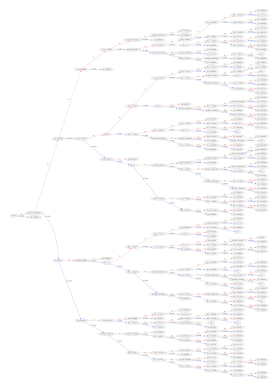

In [66]:
import xgboost as xgb
import matplotlib.pyplot as plt

import pickle

# 모델 로드 시 변수에 할당하지 않으면 오류 발생
with open('models/best_model_DE1_dg.pkl', 'rb') as file:
    best_model_DE1_dg = pickle.load(file)

# 첫 번째 트리 시각화 (여기서 'num_trees' 파라미터를 설정)
xgb.plot_tree(best_model_DE1_dg, num_trees=3)  # rankdir='LR'은 좌에서 우로 트리 그리기
plt.show()


In [57]:
import os
import joblib
import xgboost as xgb
import graphviz

# 모델 디렉토리
model_dir = "models"

# 로드된 모델을 저장할 딕셔너리
loaded_models = {}

# 모델 파일 로드
for filename in os.listdir(model_dir):
    if filename.endswith(".pkl"):
        model_path = os.path.join(model_dir, filename)
        model_name = os.path.splitext(filename)[0]  # 확장자 제거한 이름
        loaded_models[model_name] = joblib.load(model_path)
        print(f"Loaded model: {model_name} from {model_path}")

# 트리 시각화 함수
def visualize_xgboost_tree(model, tree_index=0, output_file="tree_output", max_depth=3, rankdir='LR'):
    """
    XGBoost 모델의 트리를 시각화하여 PNG 파일로 저장.
    :param model: XGBoost 모델
    :param tree_index: 시각화할 트리의 인덱스
    :param output_file: 저장할 파일 이름 (파일 형식은 .png)
    :param max_depth: 트리의 최대 깊이
    :param rankdir: 트리 레이아웃 (LR: Left-Right)
    """
    # Graphviz로 트리 생성 (속성 설정 추가)
    graph = xgb.to_graphviz(model, num_trees=tree_index, rankdir=rankdir, max_depth=max_depth)

    # 그래프를 .png 파일로 저장
    output_path = f"{output_file}.png"
    graph.render(output_path, format='png', view=True)  # 파일을 .png 형식으로 저장하고 열기
    print(f"Tree visualized and saved to {os.path.abspath(output_path)}")

# 모든 모델에 대해 트리 시각화
for model_name, model in loaded_models.items():
    print(f"Visualizing tree for model: {model_name}")
    visualize_xgboost_tree(model, tree_index=0, output_file=model_name)  # 첫 번째 트리를 시각화


Loaded model: best_model_DE1_dg from models/best_model_DE1_dg.pkl
Loaded model: best_model_DN1_dg from models/best_model_DN1_dg.pkl
Loaded model: best_model_DJ8_dg from models/best_model_DJ8_dg.pkl
Loaded model: best_model_DH4_dg from models/best_model_DH4_dg.pkl
Loaded model: best_model_DL1_dg from models/best_model_DL1_dg.pkl
Loaded model: best_model_DI2_dg from models/best_model_DI2_dg.pkl
Loaded model: best_model_DJ6_dg from models/best_model_DJ6_dg.pkl
Loaded model: best_model_DI1_dg from models/best_model_DI1_dg.pkl
Loaded model: best_model_DJ4_dg from models/best_model_DJ4_dg.pkl
Visualizing tree for model: best_model_DE1_dg


XGBoostError: [14:13:14] /workspace/src/tree/tree_model.cc:598: Failed to parse graphviz parameters:
	{"graph_attrs": {"rankdir": "LR", "max_depth": 3}}
With error:
[14:13:14] /workspace/dmlc-core/include/dmlc/json.h:677: Check failed: ch == '\"' (51 vs. ") : Error at Line 0, around ^`}}`, Expect '"' but get '3'
Stack trace:
  [bt] (0) /usr/local/lib/python3.11/dist-packages/xgboost/lib/libxgboost.so(+0x22dcbc) [0x7fea2242dcbc]
  [bt] (1) /usr/local/lib/python3.11/dist-packages/xgboost/lib/libxgboost.so(+0x756640) [0x7fea22956640]
  [bt] (2) /usr/local/lib/python3.11/dist-packages/xgboost/lib/libxgboost.so(+0x771c0b) [0x7fea22971c0b]
  [bt] (3) /usr/local/lib/python3.11/dist-packages/xgboost/lib/libxgboost.so(+0x77290a) [0x7fea2297290a]
  [bt] (4) /usr/local/lib/python3.11/dist-packages/xgboost/lib/libxgboost.so(+0x7531b9) [0x7fea229531b9]
  [bt] (5) /usr/local/lib/python3.11/dist-packages/xgboost/lib/libxgboost.so(+0x74fa96) [0x7fea2294fa96]
  [bt] (6) /usr/local/lib/python3.11/dist-packages/xgboost/lib/libxgboost.so(+0x74fdcd) [0x7fea2294fdcd]
  [bt] (7) /usr/local/lib/python3.11/dist-packages/xgboost/lib/libxgboost.so(+0x58bb44) [0x7fea2278bb44]
  [bt] (8) /usr/local/lib/python3.11/dist-packages/xgboost/lib/../../xgboost.libs/libgomp-24e2ab19.so.1.0.0(GOMP_parallel+0x46) [0x7fea3e811726]


Stack trace:
  [bt] (0) /usr/local/lib/python3.11/dist-packages/xgboost/lib/libxgboost.so(+0x22dcbc) [0x7fea2242dcbc]
  [bt] (1) /usr/local/lib/python3.11/dist-packages/xgboost/lib/libxgboost.so(+0x77424b) [0x7fea2297424b]
  [bt] (2) /usr/local/lib/python3.11/dist-packages/xgboost/lib/libxgboost.so(+0x7531b9) [0x7fea229531b9]
  [bt] (3) /usr/local/lib/python3.11/dist-packages/xgboost/lib/libxgboost.so(+0x74fa96) [0x7fea2294fa96]
  [bt] (4) /usr/local/lib/python3.11/dist-packages/xgboost/lib/libxgboost.so(+0x74fdcd) [0x7fea2294fdcd]
  [bt] (5) /usr/local/lib/python3.11/dist-packages/xgboost/lib/libxgboost.so(+0x58bb44) [0x7fea2278bb44]
  [bt] (6) /usr/local/lib/python3.11/dist-packages/xgboost/lib/../../xgboost.libs/libgomp-24e2ab19.so.1.0.0(GOMP_parallel+0x46) [0x7fea3e811726]
  [bt] (7) /usr/local/lib/python3.11/dist-packages/xgboost/lib/libxgboost.so(+0x58f745) [0x7fea2278f745]
  [bt] (8) /usr/local/lib/python3.11/dist-packages/xgboost/lib/libxgboost.so(+0x58fb39) [0x7fea2278fb39]



### 예측

In [34]:
# 예측할 데이터 준비
# allownc, npins, EC_occp, HE_obe, BD1_11, BD2_14, BP16_1, BP16_2, BS3_1, BE5_1 등의 컬럼은 주어진 대로 설정
# 나머지 컬럼은 랜덤하게 0 또는 1을 선택합니다.

training_columns = ['allownc', 'npins', 'EC_occp', 'HE_obe', 'BD1_11', 'BD2_14', 'BP16_1', 'BP16_2',
                    'BS3_1', 'BE5_1', 'HE_fh', 'HE_HPfh1', 'HE_HPfh2', 'HE_HPfh3', 'HE_HLfh1', 'HE_HLfh2',
                    'HE_HLfh3', 'HE_IHDfh1', 'HE_IHDfh2', 'HE_IHDfh3', 'HE_STRfh1', 'HE_STRfh2', 'HE_STRfh3',
                    'HE_DMfh1', 'HE_DMfh2', 'HE_DMfh3']  # 훈련 데이터 컬럼 예시

# 예측할 데이터의 컬럼 설정 (일부 예시 컬럼만 추가)
input_data = {
    'allownc': [0],
    'npins': [1],
    'EC_occp': [2],
    'HE_obe': [4],
    'BD1_11': [2],
    'BD2_14': [1],
    'BP16_1': [8],
    'BP16_2': [6],
    'BS3_1': [1],
    'BE5_1': [4]
}

# 나머지 컬럼들을 랜덤값으로 추가 (훈련 데이터에서 필요한 컬럼만 추가)
for col in training_columns[10:]:  # 필요한 컬럼들만 랜덤으로 채우기
    input_data[col] = [random.choice([0, 1])]

# 예측 데이터프레임으로 변환
X_new = pd.DataFrame(input_data)

# 훈련 데이터에서 사용한 컬럼 순서로 맞추기
X_new = X_new[training_columns]


In [67]:
import os
import joblib

# 저장된 모델 디렉토리
model_dir = "models"

# 로드된 모델을 저장할 딕셔너리
loaded_models = {}

# 모델 파일 로드
for filename in os.listdir(model_dir):
    if filename.endswith(".pkl"):
        model_path = os.path.join(model_dir, filename)
        model_name = os.path.splitext(filename)[0]  # 확장자 제거한 이름
        loaded_models[model_name] = joblib.load(model_path)
        print(f"Loaded model: {model_name} from {model_path}")

# 모델 불러오기
loaded_models[model_name] = joblib.load(model_path)

# 예측 결과 저장 딕셔너리
predictions = {}

# 로드된 모델을 사용하여 예측 수행
for model_name, model in loaded_models.items():
    # 예측 수행
    y_pred = model.predict(X_new)  # 예측된 클래스
    y_proba = model.predict_proba(X_new)[:, 1]  # 양성 클래스 확률

    # 결과 저장
    predictions[model_name] = {
        "predicted_class": y_pred,
        "positive_class_prob": y_proba
    }

    # 결과 출력
    print(f"Model: {model_name}")
    print("예측된 클래스:", y_pred)
    print("해당 질병에 걸릴 확률:", y_proba)
    print("-" * 50)

# 최종 결과 확인
print("\nFinal Predictions:")
for model_name, result in predictions.items():
    print(f"{model_name} - Predicted Classes: {result['predicted_class']}")
    print(f"{model_name} - Positive Class Probabilities: {result['positive_class_prob']}")


Loaded model: best_model_DE1_dg from models/best_model_DE1_dg.pkl
Loaded model: best_model_DN1_dg from models/best_model_DN1_dg.pkl
Loaded model: best_model_DJ8_dg from models/best_model_DJ8_dg.pkl
Loaded model: best_model_DH4_dg from models/best_model_DH4_dg.pkl
Loaded model: best_model_DL1_dg from models/best_model_DL1_dg.pkl
Loaded model: best_model_DI2_dg from models/best_model_DI2_dg.pkl
Loaded model: best_model_DJ6_dg from models/best_model_DJ6_dg.pkl
Loaded model: best_model_DI1_dg from models/best_model_DI1_dg.pkl
Loaded model: best_model_DJ4_dg from models/best_model_DJ4_dg.pkl
Model: best_model_DE1_dg
예측된 클래스: [1]
해당 질병에 걸릴 확률: [0.7046831]
--------------------------------------------------
Model: best_model_DN1_dg
예측된 클래스: [0]
해당 질병에 걸릴 확률: [0.45323777]
--------------------------------------------------
Model: best_model_DJ8_dg
예측된 클래스: [0]
해당 질병에 걸릴 확률: [0.20979656]
--------------------------------------------------
Model: best_model_DH4_dg
예측된 클래스: [0]
해당 질병에 걸릴 확률: [0.3119